In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Train and Test data

df_train=pd.read_csv('big_data_Train.csv')
df_test=pd.read_csv('big_data_Test.csv')

In [3]:
#Checking the shape of train and test data

print('Train_data:',df_train.shape)
print('Test_data:',df_test.shape)

Train_data: (8523, 12)
Test_data: (5681, 11)


Its good idea to combine both train and test data sets into one,
perform EDA and then divide them later again.

In [4]:
#Seeing train  dataset
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#Seeing the train dataset

df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
#Giving tag for training and testing data

df_train['source']='Train'
df_test['source']='Test'

In [7]:
#Sorting non-concatenation axis if it is not already aligned when join is ‘outer’ and (by default join='outer')

df=pd.concat([df_train,df_test],sort=True,ignore_index=True)
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,Train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train


In [8]:
df.tail()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
14199,Regular,FDB58,141.3154,NaN,Snack Foods,0.013496,10.5,1997,OUT046,Tier 1,Small,Supermarket Type1,Test
14200,Regular,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.6,2009,OUT018,Tier 3,Medium,Supermarket Type2,Test
14201,Low Fat,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10.0,2002,OUT045,Tier 2,NaN,Supermarket Type1,Test
14202,Regular,FDJ26,214.6218,NaN,Canned,0.000000,15.3,2007,OUT017,Tier 2,NaN,Supermarket Type1,Test
14203,Regular,FDU37,79.7960,NaN,Canned,0.104720,9.5,2002,OUT045,Tier 2,NaN,Supermarket Type1,Test


In [9]:
#Checking Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Fat_Content           14204 non-null  object 
 1   Item_Identifier            14204 non-null  object 
 2   Item_MRP                   14204 non-null  float64
 3   Item_Outlet_Sales          8523 non-null   float64
 4   Item_Type                  14204 non-null  object 
 5   Item_Visibility            14204 non-null  float64
 6   Item_Weight                11765 non-null  float64
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Identifier          14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Size                10188 non-null  object 
 11  Outlet_Type                14204 non-null  object 
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [10]:
#Checking for missing value
df.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

interpretation:
    
    1)total 14204 rows and 12 columns are present n dataset
    2)null values are present

In [11]:
df.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


Observation:- More outliers present in Item_Outlet_Sales and min value of Item_Visibility is zero.

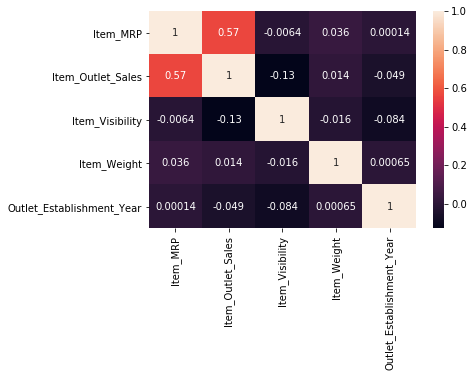

In [12]:
sns.heatmap(df.corr(),annot=True)

Observation:- Not any columns positively correlated to each other above 0.5.

In [13]:
#Distribution plot for all numeric columns including target columns

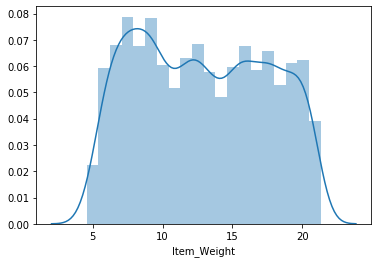

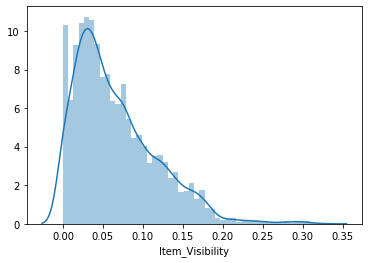

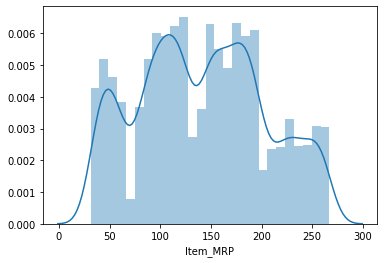

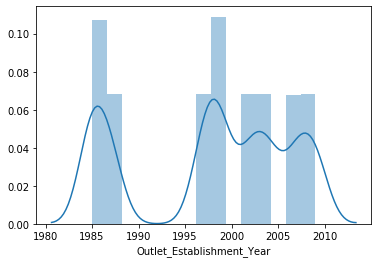

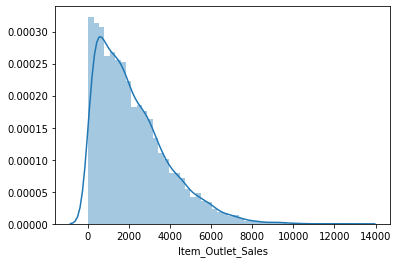

In [14]:
for i in df_train.describe().columns:
    sns.distplot(df_train[i].dropna())
    plt.show()

obervation: item outlet has skewed

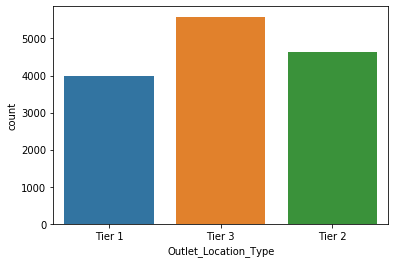

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64


In [15]:
#Checking for Outlet Location Type
sns.countplot(df["Outlet_Location_Type"])
plt.show()
print(df['Outlet_Location_Type'].value_counts())

obervation: tier 3 has maximum count and tier 1 has min count

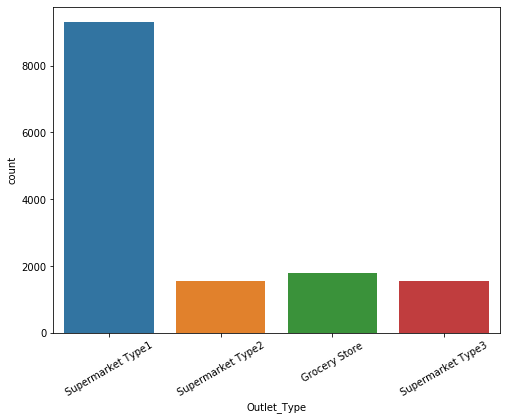

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64


In [16]:
#Checking the outlet type
plt.figure(figsize=(8,6))
sns.countplot(df['Outlet_Type'])
plt.xticks(rotation=30)   # x-axis value name rotation
plt.show()
print(df['Outlet_Type'].value_counts())

obervation: supermarket 1 has max count

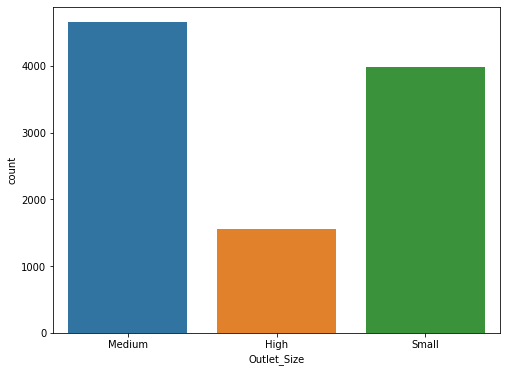

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64


In [17]:
#Other way to plot the uper graph
plt.figure(figsize=(8,6))
sns.countplot(df["Outlet_Size"])
plt.show()
print(df['Outlet_Size'].value_counts())

minimum outlet size has max count

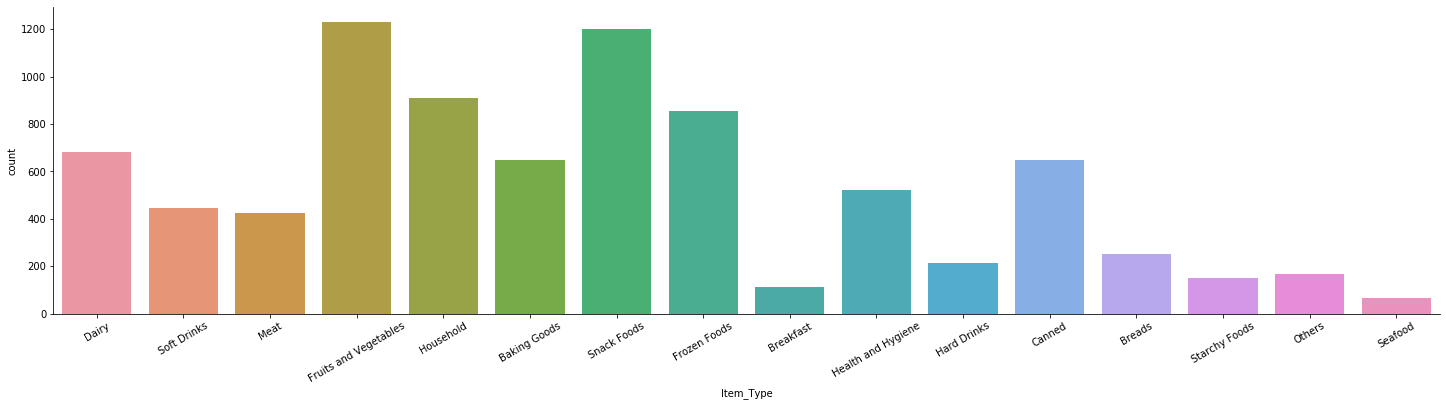

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


In [18]:
#Checking the distribution of various items
sns.catplot(x= "Item_Type", data=df_train, kind='count',aspect=4)
plt.xticks(rotation=30)
plt.show()
print(df_train['Item_Type'].value_counts())


obervation:
 
1)Fruits and Vegetables are max count and seafood has min count

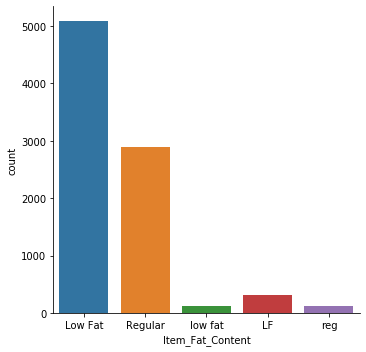

In [19]:
#Checking the fat content of item
sns.catplot(x= "Item_Fat_Content", data= df_train, kind = "count")
plt.show()

obervation: low fat has max count

Text(0.5, 1.0, 'Item weight and Item outlet sales Analysis')

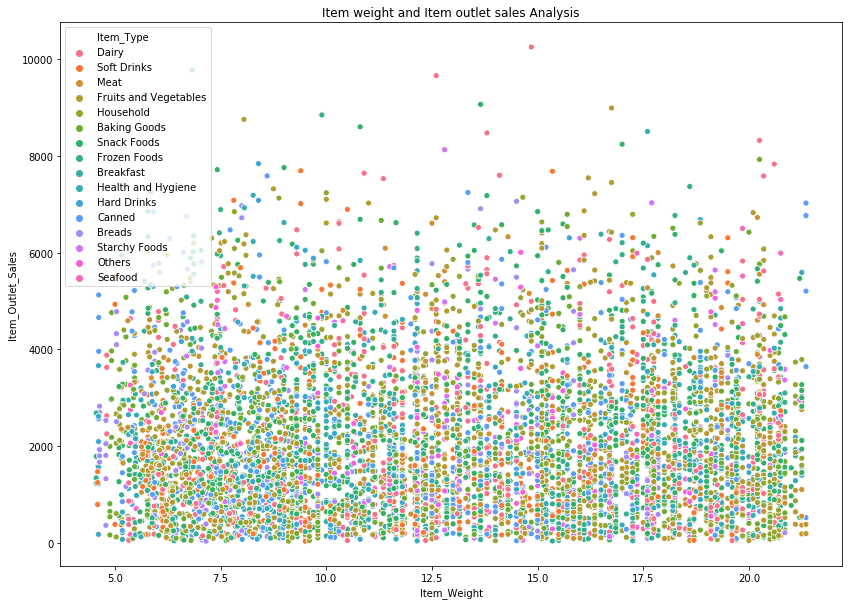

In [20]:
#Item weight and Item outlet sales Analysis
plt.figure(figsize=(14,10))
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',hue='Item_Type',data=df_train)
plt.title("Item weight and Item outlet sales Analysis")

Text(0.5, 1.0, 'Item visibility and Item outlet sales Analysis')

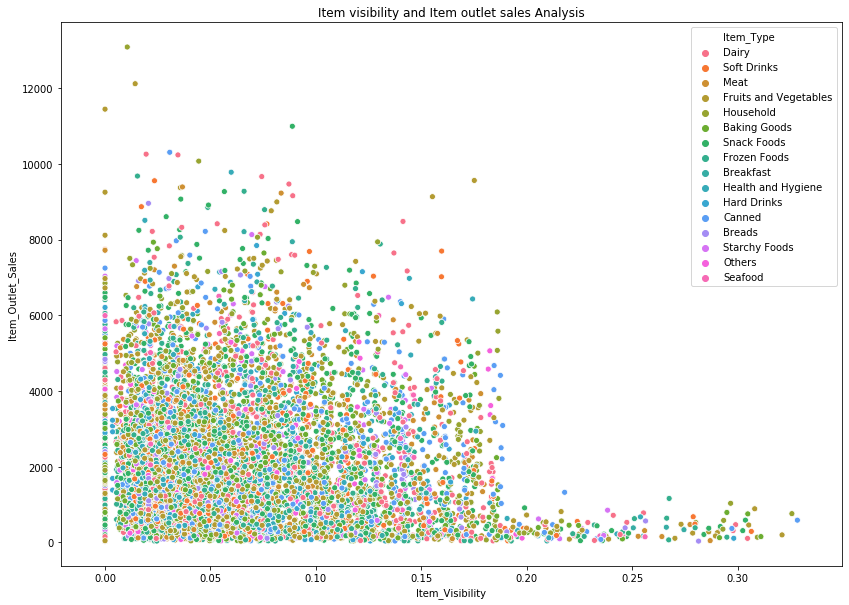

In [21]:
#Checking the item visibility abd their sales

plt.figure(figsize=(14,10))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Type',data=df_train)
plt.title("Item visibility and Item outlet sales Analysis")

Text(0.5, 1.0, 'Item MRP and Item outlet sales Analysis')

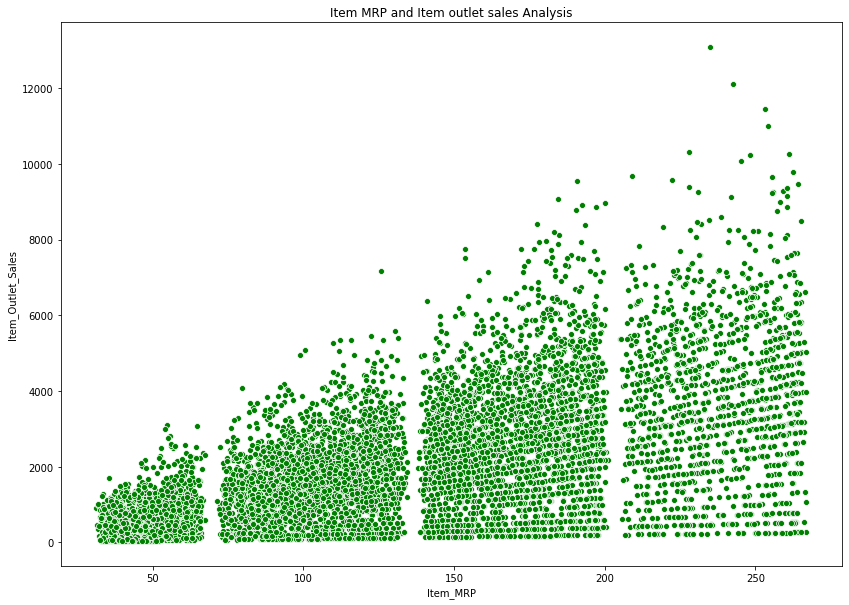

In [22]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',color='g',data=df_train)
plt.title("Item MRP and Item outlet sales Analysis")

Text(0.5, 1, 'Impact of outlet Types on Outlet size')

<Figure size 1008x720 with 0 Axes>

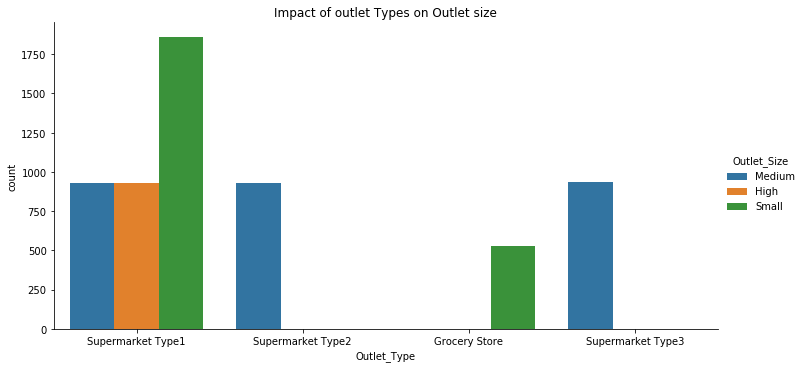

In [23]:
#Checking the outlet impact on outlet size
plt.figure(figsize=(14,10))
sns.catplot(x= "Outlet_Type", data= df_train, kind = "count", aspect = 2, hue="Outlet_Size")
plt.title("Impact of outlet Types on Outlet size")

obervation: in supermarket 1 small item are max count

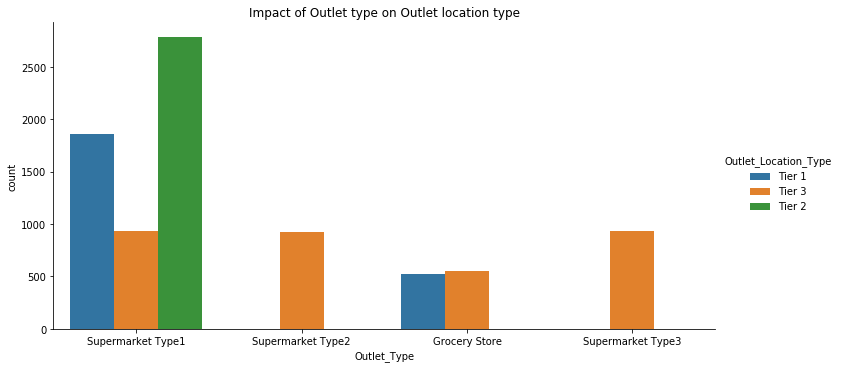

In [24]:
#Checking the outlet location based on their typy
sns.catplot(x= "Outlet_Type", data= df_train, kind = "count", aspect = 2, hue="Outlet_Location_Type")
plt.title('Impact of Outlet type on Outlet location type')
plt.show()

obervation: in supermarket 1 tier2 has max count

In [25]:
Item_Fat_Content_pivot=df_train.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales',aggfunc=np.median)
Item_Fat_Content_pivot

,Item_Outlet_Sales
Item_Fat_Content,
LF,1797.6600
Low Fat,1765.7016
Regular,1845.5976
low fat,1614.2321
reg,1492.7236


In [26]:
#Replacing some items because same items exist with different name
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [27]:
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

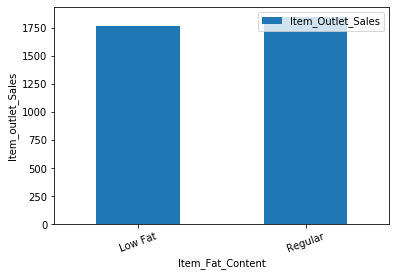

In [28]:
Item_Fat_Content_pivot=df_train.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales',aggfunc=np.median)
Item_Fat_Content_pivot
Item_Fat_Content_pivot.plot(kind='bar')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_outlet_Sales')
plt.xticks(rotation=20)
plt.show()


low fat and regular has same count

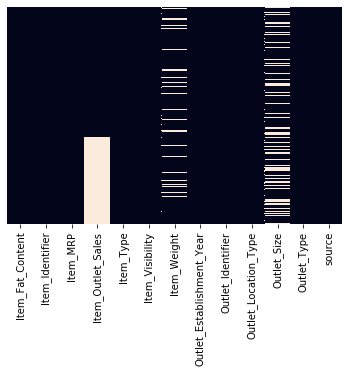

In [29]:
#Treating the missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [30]:
df.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [31]:
#Item Weight
#Filling NaN values with mean
df['Item_Weight'].mean()

12.792854228644991

In [32]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [33]:
#Outlet Size
#Filling NaN value with mode
df['Outlet_Size'].value_counts()      #here Medium is frequently arrived

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [34]:
df['Outlet_Size'].fillna('Medium',inplace=True)

In [35]:
#Item_Outlet_Sales
df['Item_Outlet_Sales'].mean()

2181.2889135750365

In [36]:
df['Item_Outlet_Sales'].fillna(df['Item_Outlet_Sales'].mean(),inplace=True)

In [37]:
df.isnull().sum()

Item_Fat_Content             0
Item_Identifier              0
Item_MRP                     0
Item_Outlet_Sales            0
Item_Type                    0
Item_Visibility              0
Item_Weight                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Type                  0
source                       0
dtype: int64

In [38]:
df['Item_Visibility']=df['Item_Visibility'].replace(0.00,np.NaN)
df['Item_Visibility'].isna().sum()

879

In [39]:
df['Item_Visibility'].fillna(df['Item_Visibility'].median(),inplace=True)

In [40]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [41]:
#Introducing a new column No of years of establishment of outlet
df['Outlet_Year']=2020-df['Outlet_Establishment_Year']

In [42]:
df

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Year
0,Low Fat,FDA15,249.8092,3735.138000,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,21
1,Regular,DRC01,48.2692,443.422800,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train,11
2,Low Fat,FDN15,141.6180,2097.270000,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,21
3,Regular,FDX07,182.0950,732.380000,Fruits and Vegetables,0.057851,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,Train,22
4,Low Fat,NCD19,53.8614,994.705200,Household,0.057851,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,Regular,FDB58,141.3154,2181.288914,Snack Foods,0.013496,10.50,1997,OUT046,Tier 1,Small,Supermarket Type1,Test,23
14200,Regular,FDD47,169.1448,2181.288914,Starchy Foods,0.142991,7.60,2009,OUT018,Tier 3,Medium,Supermarket Type2,Test,11
14201,Low Fat,NCO17,118.7440,2181.288914,Health and Hygiene,0.073529,10.00,2002,OUT045,Tier 2,Medium,Supermarket Type1,Test,18
14202,Regular,FDJ26,214.6218,2181.288914,Canned,0.057851,15.30,2007,OUT017,Tier 2,Medium,Supermarket Type1,Test,13


In [43]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [44]:
df['Item_Identifier'].value_counts()

FDY40    10
FDG46    10
FDC47    10
FDD56    10
NCX30    10
         ..
DRN11     7
FDS22     7
FDM10     7
NCL42     7
FDM52     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [45]:
#Here only three item category
#Creating a new column New_Item_Type
df['New_Item_Type']=df['Item_Identifier'].apply(lambda x:x[0:2])

In [46]:
#Rename them
df['New_Item_Type']=df['New_Item_Type'].map({'FD':'Food','DR':'Drink','NC':'Non-Consumable'})
df['New_Item_Type'].value_counts()

Food              10201
Non-Consumable     2686
Drink              1317
Name: New_Item_Type, dtype: int64

In [47]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Year,New_Item_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,21,Food
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train,11,Drink
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,21,Food
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.057851,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,Train,22,Food
4,Low Fat,NCD19,53.8614,994.7052,Household,0.057851,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train,33,Non-Consumable


In [48]:
#If a product is Non-Consumable them why it contains fat content
df.loc[df['New_Item_Type']=="Non-Consumable","Item_Fat_Content"]='Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [49]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Year,New_Item_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,21,Food
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train,11,Drink
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,21,Food
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.057851,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,Train,22,Food
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.057851,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train,33,Non-Consumable


In [50]:
#We will convert all categorical variables into numeric types using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#New Variable for outlet
df['Outlet']=le.fit_transform(df['Outlet_Identifier'])

col=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','New_Item_Type','Outlet']
for i in col:
    df[i]=le.fit_transform(df[i])

In [51]:
df=pd.get_dummies(df,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','New_Item_Type','Outlet'])
df.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Outlet_Year,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Train,21,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Train,11,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Train,21,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.057851,19.20,1998,OUT010,Train,22,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,Household,0.057851,8.93,1987,OUT013,Train,33,...,0,1,0,0,0,0,0,0,0,0


In [52]:
df.drop ( ["Item_Type","Outlet_Establishment_Year",'Item_Identifier','Outlet_Identifier'] , inplace = True , axis = 1)
df.head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,source,Outlet_Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,249.8092,3735.1380,0.016047,9.30,Train,21,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,48.2692,443.4228,0.019278,5.92,Train,11,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,141.6180,2097.2700,0.016760,17.50,Train,21,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,182.0950,732.3800,0.057851,19.20,Train,22,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,53.8614,994.7052,0.057851,8.93,Train,33,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [53]:
#Copy the dataframe
df1=df.copy()

In [54]:
df1.drop ( ["source"] , inplace = True , axis = 1)
df1.head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,249.8092,3735.1380,0.016047,9.30,21,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,48.2692,443.4228,0.019278,5.92,11,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,141.6180,2097.2700,0.016760,17.50,21,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,182.0950,732.3800,0.057851,19.20,22,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,53.8614,994.7052,0.057851,8.93,33,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [55]:
#checking for outliers
df2=df1.copy()
from scipy.stats import zscore
z=np.abs(zscore(df2))
threshold=3
np.where(z>3)
df2_new=df2[(z<3).all(axis=1)]
print(df2.shape,'\t',df2_new.shape)

(14204, 31) 	 (11017, 31)


In [56]:
df1=df2_new
df1.shape

(11017, 31)

In [57]:
# x y splitting

In [58]:
x=df1.drop(['Item_Outlet_Sales'],axis=1)
x.shape

(11017, 30)

In [59]:
y=df1['Item_Outlet_Sales']
y.shape

(11017,)

In [70]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print('x_train.shape: ',x_train.shape,'x_test.shape: ',x_test.shape,'\ny_train.shape',y_train.shape,'y_test.shape',y_test.shape)

x_train.shape:  (8813, 30) x_test.shape:  (2204, 30) 
y_train.shape (8813,) y_test.shape (2204,)


In [62]:
#Linear Regression
lg=LinearRegression()
lg.fit(x_train,y_train)
print('Score:',lg.score(x_train,y_train))
y_pred=lg.predict(x_test)
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared_error:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2 score:',r2_score(y_test,y_pred))

Score: 0.275273579495519
Mean absolute error: 716.2577969231261
Mean squared_error: 868972.06040408
RMSE: 932.1867089827444
r2 score: 0.28603654090122155


In [63]:
ls=Lasso(alpha=0.01)
ls.fit(x_train,y_train)
print(ls.coef_)
print(ls.intercept_)
score=ls.score(x_train,y_train)
print('score:',score)
predls=ls.predict(x_test)
print('errors:')
print('mean squared error:',mean_squared_error(y_test,predls))
print('mean absolute error:',mean_absolute_error(y_test,predls))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,predls)))
print('r2 score:',r2_score(y_test,predls))
print('score:',score*100,'%')

[   8.72140098  -95.72007633   -1.44740154   17.18275323   -6.26823644
   -0.           42.11027516  -33.08602482   53.29418529   -0.
 -227.90337048    2.32855401   -0.            0.          -70.19411305
 -115.04626345  202.62665094    0.            0.           -0.
    0.           -0.           35.12845327   -0.            0.
    5.02544582   89.27440263 -110.73081719  -16.11443664    0.        ]
728.2653156149922
score: 0.275273523865165
errors:
mean squared error: 868971.4563676156
mean absolute error: 716.2562437113863
root mean squared error: 932.1863849936963
r2 score: 0.28603703718871243
score: 27.5273523865165 %


In [64]:
rd=Ridge(alpha=0.001)
rd.fit(x_train,y_train)
print(rd.coef_)
print(rd.intercept_)
score=rd.score(x_train,y_train)
print('score:',score)
predrd=rd.predict(x_test)
print('errors:')
print('mean squared error:',mean_squared_error(y_test,predrd))
print('mean absolute error:',mean_absolute_error(y_test,predrd))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,predrd)))
print('r2 score:',r2_score(y_test,predrd))
print('score:',score*100,'%')

[   8.72137085 -101.52945703   -1.44719575   18.9658805   -21.64969085
   -5.13845375   26.78814467  -29.94663172   51.42163079  -21.47499941
  -92.4085421    37.9468102    54.4617313     0.          -70.9335422
  -34.54890634  105.48244873    0.            5.13845381   -5.13845374
    0.          -92.40854204   58.80264008  -34.54890637    0.
  105.48244897   88.75509014  -96.13610002  -34.29335884    4.34672781]
659.0903723104666
score: 0.2752735794954485
errors:
mean squared error: 868972.0583015098
mean absolute error: 716.2577946520167
root mean squared error: 932.1867078549822
r2 score: 0.2860365426287319
score: 27.52735794954485 %


In [65]:
#Using SVC() from SVM

svr=SVR()
svr.fit(x_train,y_train)
score=svr.score(x_train,y_train)
print('score:',score)
pred=svr.predict(x_test)
print('errors:')
print('mean squared error:',mean_squared_error(y_test,pred))
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print('r2 score:',r2_score(y_test,pred))
print('score:',score*100,'%')

score: 0.010406926929522053
errors:
mean squared error: 1211692.5171417315
mean absolute error: 687.2637658541206
root mean squared error: 1100.769057133117
r2 score: 0.004451097656310021
score: 1.0406926929522053 %


In [66]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
score=dtr.score(x_train,y_train)
print('score:',score)
print('errors:')
print('mean squared error:',mean_squared_error(y_test,preddtr))
print('mean absolute error:',mean_absolute_error(y_test,preddtr))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,preddtr)))
print('r2 score:',r2_score(y_test,preddtr))
print('score:',score*100,'%')

score: 1.0
errors:
mean squared error: 1856149.8581770766
mean absolute error: 995.3365057133968
root mean squared error: 1362.4059080087243
r2 score: -0.5250469304313097
score: 100.0 %


In [67]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
predknr=knr.predict(x_test)
score=knr.score(x_train,y_train)
print('score:',score)
print('errors:')
print('mean squared error:',mean_squared_error(y_test,predknr))
print('mean absolute error:',mean_absolute_error(y_test,predknr))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,predknr)))
print('r2 score:',r2_score(y_test,predknr))
print('score:',score*100,'%')

score: 0.4208680411977205
errors:
mean squared error: 1027172.442673195
mean absolute error: 767.0585558440883
root mean squared error: 1013.495161642716
r2 score: 0.15605619135685989
score: 42.08680411977205 %


In [79]:
rf=RandomForestRegressor(n_estimators=230,random_state=42)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
score=rf.score(x_train,y_train)
print('score:',score)
print('errors:')
print('mean squared error:',mean_squared_error(y_test,predrf))
print('mean absolute error:',mean_absolute_error(y_test,predrf))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))
print('r2 score:',r2_score(y_test,predrf))
print('score:',score*100,'%')

score: 0.8892246285581124
errors:
mean squared error: 977053.1419615644
mean absolute error: 754.1862370157148
root mean squared error: 988.4599850077718
r2 score: 0.19723513246924518
score: 88.92246285581123 %


In [80]:
#as we can see that random forest regressor gives good prediction and having low mean squared error so we use this model

In [82]:
#Saving the model
import joblib

#Save the model as a pickle in a file
joblib.dump(rf,'big_data_mart.pkl')

['big_data_mart.pkl']